# Primer Dashboard Sobre COVID-19

_Elias Buitrago B, Sonia Ardila_

Visualización de Datos

Maestría en Analítica de Datos

Universidad Central

Bogotá, Colombia

_21 Agosto 2020_

En este cuaderno se muestra el proceso para preparar un Widget que muestre el índice de letalidad por COVID-19 en la ciudad de Bogotá. Se utiliza datos descargados directeamente del portal datos abiertos. Dichos datos se descargan actualizados diariamente, por lo cual, el gráfico resultante está actualizado. El índice de letalidad permite mostrar la tasa de fallecidos entre los casos confirmados positivos.

## Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
import ipywidgets as widgets
import numpy as np
import re

## Carga y preparación de los datos
Teniendo en cuenta que el archivo de datos _.csv_ que se descarga de datos abiertos, continene errores al final de los registros, se agregan las líneas de código que permiten hacer el cargue correcto de los mismos de manera automática.

In [2]:
date = re.sub("-","",pd.to_datetime('today').strftime('%d-%m-%Y'))
txt_ini = "https://datosabiertos.bogota.gov.co/dataset/44eacdb7-a535-45ed-be03-16dbbea6f6da/resource/b64ba3c4-9e41-41b8-b3fd-2da21d627558/download/osb_enftransm-covid-"
txt_fini = "-.csv"
url = txt_ini + date + txt_fini

In [3]:
# Se cargan los datos un vez
df=pd.read_csv(url,encoding='latin1', error_bad_lines=False, sep =";")

In [8]:
# Con base en esos datos cargados, se detecta el último registro para volver a cargar los datos hasta ese último registro. 
# De esta manera se evita cargar el texto final del archivo csv original.
df=pd.read_csv(url,encoding='latin1', error_bad_lines=False, sep =";",nrows=df['Estado'].count())
df

,Fecha de inicio de síntomas,Fecha de diagnóstico,Ciudad de residencia,Localidad de residencia,Edad,Unidad de medida de la edad,Sexo,Tipo de caso,Ubicación,Estado
0,26/02/2020,6/03/2020,Bogotá,Usaquén,19,1,F,Importado,Casa,Recuperado
1,4/03/2020,10/03/2020,Bogotá,Engativá,22,1,F,Importado,Casa,Recuperado
2,7/03/2020,10/03/2020,Bogotá,Engativá,28,1,F,Importado,Casa,Recuperado
3,6/03/2020,12/03/2020,Bogotá,Fontibón,36,1,F,Importado,Casa,Recuperado
4,6/03/2020,12/03/2020,Bogotá,Bosa,42,1,F,Importado,Casa,Recuperado
...,...,...,...,...,...,...,...,...,...,...
179535,1/08/2020,20/08/2020,Bogotá,Engativá,51,1,F,En estudio,Casa,Leve
179536,1/08/2020,20/08/2020,Bogotá,Usaquén,30,1,F,En estudio,Casa,Leve
179537,1/08/2020,20/08/2020,Bogotá,Kennedy,38,1,M,En estudio,Casa,Leve
179538,1/08/2020,20/08/2020,Bogotá,Bosa,50,1,M,En estudio,Casa,Leve


In [238]:
# Crear un subconjunto de datos incluyendo las siguientes variables:
# 'Fecha de diagnóstico','Localidad de residencia','Estado'
df2 = df[['Fecha de diagnóstico','Localidad de residencia','Estado']]
df2

,Fecha de diagnóstico,Localidad de residencia,Estado
0,6/03/2020,Usaquén,Recuperado
1,10/03/2020,Engativá,Recuperado
2,10/03/2020,Engativá,Recuperado
3,12/03/2020,Fontibón,Recuperado
4,12/03/2020,Bosa,Recuperado
...,...,...,...
163290,15/08/2020,Sin dato,Leve
163291,15/08/2020,Sin dato,Leve
163292,15/08/2020,Sin dato,Leve
163293,15/08/2020,Antonio Nariño,Leve


## Subconjunto confirmados por localidad

In [274]:
confirmaLoc = df[["Localidad de residencia","Estado"]].groupby(by=['Localidad de residencia'], as_index=False).count()
confirmaLoc.columns = ['Localidad de residencia','Confirmados']
confirmaLoc

,Localidad de residencia,Confirmados
0,Antonio Nariño,2386
1,Barrios Unidos,2930
2,Bosa,14125
3,Chapinero,3465
4,Ciudad Bolívar,12374
5,Engativá,14160
6,Fontibón,6675
7,Fuera de Bogotá,1777
8,Kennedy,22363
9,La Candelaria,696


## Subconjunto fallecidos por localidad

In [275]:
# df[df["Localidad de residencia"]=="Barrios Unidos"].groupby("Estado").count()
falleLoc = df2[df2['Estado']=='Fallecido'].groupby(by=['Localidad de residencia'], as_index=False).count()
# falleLoc = falleLoc.sort_values(by=['Estado'], ascending=False)
falleLoc.drop(['Fecha de diagnóstico'],axis='columns', inplace=True)
falleLoc.columns = ['Localidad de residencia','Fallecidos']
falleLoc

,Localidad de residencia,Fallecidos
0,Antonio Nariño,93
1,Barrios Unidos,87
2,Bosa,333
3,Chapinero,85
4,Ciudad Bolívar,377
5,Engativá,412
6,Fontibón,165
7,Fuera de Bogotá,76
8,Kennedy,619
9,La Candelaria,19


## Calcular índice de letalidad

In [241]:
# Indice de letalidad
# letalLoc = confirmaLoc['Localidad de residencia']
# letalLoc['Letalidad'] = (falleLoc['Fallecidos'] / confirmaLoc['Confirmados']) * 100
letalLoc = falleLoc
# letalLoc

In [242]:
letalLoc['Fallecidos'] = (falleLoc['Fallecidos'] / confirmaLoc['Confirmados']) * 100
letalLoc.columns = ['Localidad de residencia','Letalidad (%)']
casos=letalLoc.sort_values('Letalidad (%)', ascending=True)
casos=round(casos,2)

,Localidad de residencia,Letalidad (%)
0,Antonio Nariño,3.897737
1,Barrios Unidos,2.969283
2,Bosa,2.357522
3,Chapinero,2.453102
4,Ciudad Bolívar,3.046711
5,Engativá,2.909605
6,Fontibón,2.471910
7,Fuera de Bogotá,4.276871
8,Kennedy,2.767965
9,La Candelaria,2.729885


## Graficar widget

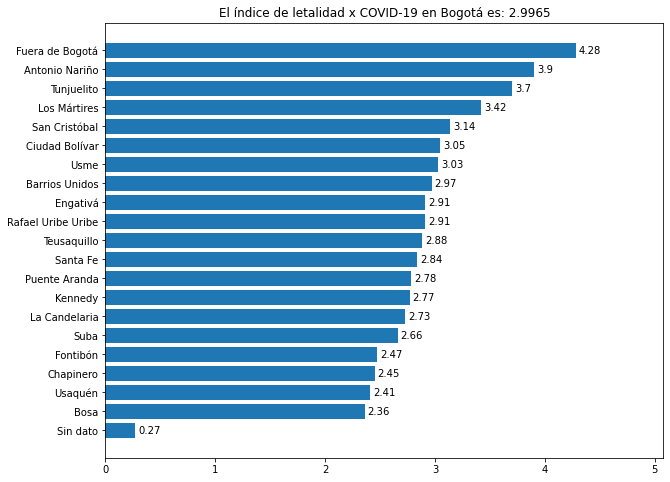

In [302]:
fig, ax = plt.subplots(figsize=(10, 8))
    # Una función para poner la cantidad de casos
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{}'.format(width),
                    xy=(width,rect.get_y() + rect.get_height() / 2),
                    xytext=(3,0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='left', va='center')
rects=ax.barh(casos['Localidad de residencia'],casos['Letalidad (%)'])
ax.set(xlim=(0, max(casos['Letalidad (%)'])+ 0.8))
plt.title("El índice de letalidad x COVID-19 en Bogotá es: "+str(sum(casos['Letalidad (%)'])/20))
autolabel(rects)
plt.show()